# Evaluación de modelos

### ¿Cómo generar confianza sobre el desempeño de un modelo?
### ¿Cómo obtener una medida de desempeño robusta a fluctuaciones de los datos?

In [1]:
import mlutils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
import warnings
warnings.simplefilter("ignore")

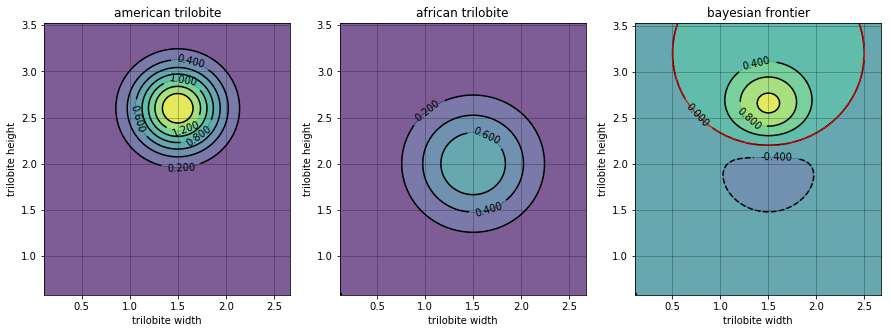

In [2]:
mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 2.6], cov0=[[0.1, 0.], [0., 0.1]],
                                        mean1=[1.5, 2.], cov1=[[0.2,0.1],[0,.2]])
mc.plot_contours()

## Solo tenemos un dataset

- remuestrea, reentrena para medir el desempeño y entender la estabilidad
- prueba con `test_pct` entre 0.1 y 0.9. observa la divergencia entre train y test cuando `test_pct` es más cercano a 0.9. ¿por qué?
- prueba con `SVC(gamma=100)`. En este caso observa la divergencia entre train y test incluso cuando `test_pct` es pequeño. ¿por qué?
- prubea además con `dataset_size` entre 20 y 500

Entiende la diferencia entre **tener pocos datos** y **overfitting**

Configuraciones interesantes sobre 

    mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 1.5], cov0=[[0.5, 0.1], [0.3, 0.5]],
                                            mean1=[1.2, 2.], cov1=[[0.2,0.1],[0,.5]])

- SVC $\gamma=100$, `dataset_size=500` (overfitting con pocos datos, convergencia con muchos)
- SVC $\gamma=100$, `dataset_size=2000` (overfitting con pocos datos, convergencia con muchos)
- SVC $\gamma=.01$, `dataset_size=100` (variabilidad siempre, convergencia promedio con pocos datos)
- SVC $\gamma=1$, `dataset_size=100` (variabilidad siempre, convergencia promedio con pocos datos)
- LinearRegression, `dataset_size=100` (nunca converge a la frontera bayesiana)



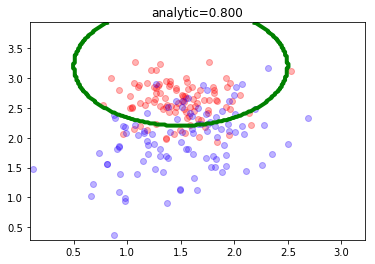

In [3]:
dataset_size = 200
X,y = mc.sample(dataset_size)
mlutils.plot_estimator_border(mc, n_samples=dataset_size, legend=False)
analitic_score = mc.analytic_score()


realizamos un muestreo para dividir entre train y test

In [4]:
test_pct = .3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_pct)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(140, 2) (140,)
(60, 2) (60,)


Text(0.5, 1.0, 'test data')

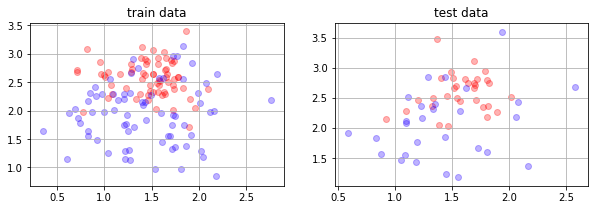

In [5]:
plt.figure(figsize=(10,3))
plt.subplot(121)
mlutils.plot_2Ddata(X_train, y_train, dots_alpha=.3)
plt.title("train data")
plt.grid()
plt.subplot(122)
mlutils.plot_2Ddata(X_test, y_test, dots_alpha=.3)
plt.grid()
plt.title("test data")

In [6]:
#estimator = SVC(gamma=1)
estimator = SVC(gamma=100)
#estimator = LogisticRegression()
#estimator = RandomForestClassifier()
estimator.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
print ("accuracy train %.2f"%estimator.score(X_train,y_train))
tr_preds = estimator.predict(X_train)
print ("predicciones para train")
print (tr_preds)
print ("ground truth para train")
print (y_train)

print ("\naccuracy test %.2f"%estimator.score(X_test,y_test))
ts_preds = estimator.predict(X_test)
print ("predicciones para test")
print (ts_preds)
print ("ground truth para test")
print (y_test)

accuracy train 0.93
predicciones para train
[0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1.]
ground truth para train
[0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1.]

accuracy test 0.73
predicciones para test
[1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1

In [8]:
np.min(X, axis=0)

array([0.35647498, 0.84221565])

train_score  0.93
test_score   0.65


(0.28195, 0.71805)

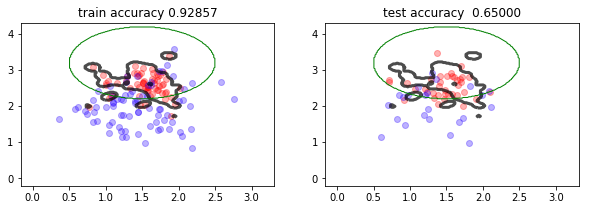

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_pct)
estimator.fit(X_train, y_train)
trsc = estimator.score(X_train, y_train)
tssc = estimator.score(X_test, y_test)
print ("train_score %5.2f"%estimator.score(X_train, y_train))
print ("test_score  %5.2f"%estimator.score(X_test, y_test))

plt.figure(figsize=(10,3))
plt.subplot(121)
mlutils.plot_2Ddata(X_train, y_train, dots_alpha=.3)
mlutils.plot_2D_boundary(estimator.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
plt.title("train accuracy %.5f"%estimator.score(X_train, y_train))

mlutils.plot_2D_boundary(mc.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=1, line_alpha=1., line_color="green", label="bayes boundary")

plt.subplot(122)
mlutils.plot_2Ddata(X_test, y_test, dots_alpha=.3)
mlutils.plot_2D_boundary(estimator.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
plt.title("test accuracy  %.5f"%estimator.score(X_test, y_test))
mlutils.plot_2D_boundary(mc.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=1, line_alpha=1., line_color="green", label="bayes boundary")


hacemos ahora el experimento más exhaustivo repitiendo 20 veces el siguiente proceso:

- se muestrea el dataset (recuerda que **excepcionalmente** tenemos acceso a las distribuciones que generan los datos y por tanto podemos hacer esto).
- se calcula la fronter de clasificación obtenida por el estimador usando el dataset muestreado.
- se pinta esta frontera (en negro).
- en verde se muestra la **frontera bayesiana**.

100% (4 of 4) |##########################| Elapsed Time: 0:00:08 Time:  0:00:08


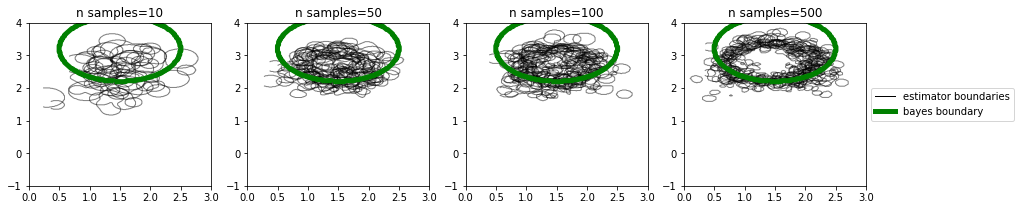

In [10]:
mlutils.sample_borders(mc, SVC(gamma=100), samples = [10,50,100,500], n_reps=20, mins=[0,-1], maxs=[3,4])

100% (4 of 4) |##########################| Elapsed Time: 0:00:05 Time:  0:00:05


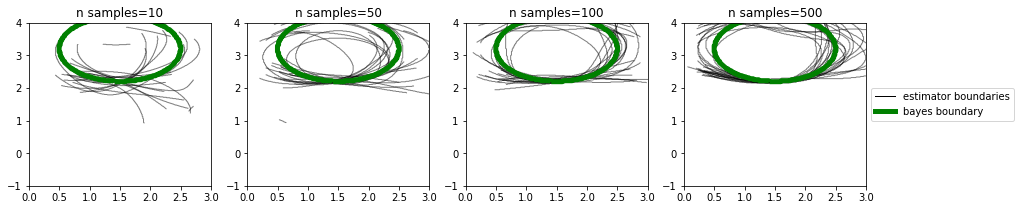

In [11]:
mlutils.sample_borders(mc, SVC(gamma=1), samples = [10,50,100,500], n_reps=20, mins=[0,-1], maxs=[3,4])

## Multidimensionalidad (>2D)

normalmente tenemos datasets de muchas dimensiones (columnas) y no podemos visualizar los datos como en 2D $\rightarrow$ necesitamos métodos para recabar evidencia sobre si tenemos pocos datos, estamos haciendo overfitting, etc.

Las **curvas de aprendizaje** nos ayudan a esto.

Realiza el experimento desde la sección anterior, con distintos tamaños del dataset inicial y con distintos algoritmos.

In [20]:
X,y = mc.sample(200)


100% (9 of 9) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


(0.6, 1)

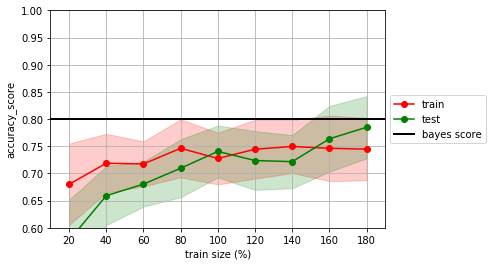

In [21]:
estimator = LogisticRegression()
mlutils.lcurve(estimator, X, y, n_reps=20, score_func=accuracy_score)
plt.axhline(analitic_score, lw=2, color="black", label="bayes score")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0.6,1)

100% (9 of 9) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


(0.6, 1)

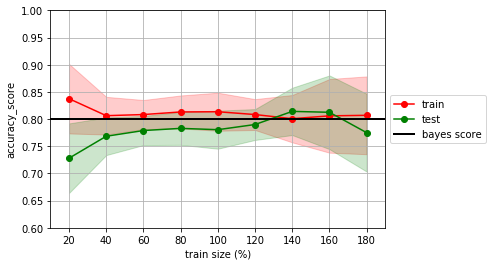

In [22]:
estimator = SVC(gamma=1)
mlutils.lcurve(estimator, X, y, n_reps=20, score_func=accuracy_score)
plt.axhline(analitic_score, lw=2, color="black", label="bayes score")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0.6,1)

100% (9 of 9) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


(0.4, 1)

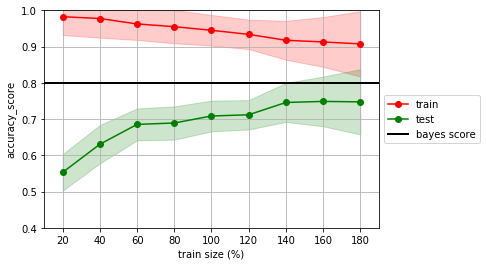

In [23]:
estimator = SVC(gamma=100)
mlutils.lcurve(estimator, X, y, n_reps=20, score_func=accuracy_score)
plt.axhline(analitic_score, lw=2, color="black", label="bayes score")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0.4,1)

no olvides que normalmente **no conocemos la _frontera bayesiana_**, y por tanto no tenemos el _bayes score_

## Taxonomía de problemas de machine learning

- Supervisados
   - Clasificación
   - Regresión
- No supervisados
   - Agrupamiento
   - Estimación de densidad
   - etc.
- Reinforcement learning


## Complejidad de los modelos vs. complejidad de los datos

![alt](imgs/bvc.png)
